# Preparación

In [1]:
import re
import subprocess

In [2]:
def ejecutar_programa(nombre_archivo):
    comando = f"..\\metricff -O -o ..\\ultim_dom.pddl -f {nombre_archivo}"

    proceso = subprocess.Popen(comando, stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE, shell=True, universal_newlines=True)
    salida, error = proceso.communicate()

    if error:
        print("Error al ejecutar el comando:", error)
        return f"ERROR: {error}"

    print("Salida del comando:\n", salida)

    match = re.search(r'(\d+\.\d+) seconds total time', salida)
    if match:
        tiempo_total = match.group(1)
        print(f"Tiempo total: {tiempo_total} segundos")
        return tiempo_total
    else:
        print("No se encontró el tiempo total")
        return "ERROR: Tiempo no encontrado"

In [3]:
class llibre:
    def __init__(self, nom_llibre: str, num_pg: int = None) -> None:
        self.nom_llibre = nom_llibre
        self.num_pg = num_pg

In [4]:
import random
import math


def dividir_lista_aleatoriamente(lista_original, semilla:int ,max_tamano_sublista=12):
    # Copia la lista original para evitar modificar la original
    random.seed(semilla) 
    lista_temporal = lista_original[:]
    listas_divididas = []

    # Continuar mientras la lista temporal tenga elementos
    while lista_temporal:
        # Elige un tamaño aleatorio para la sub-lista
        tamano_sublista = random.randint(1, min(max_tamano_sublista, len(lista_temporal)))

        # Extrae los elementos y los agrega a la nueva sub-lista
        sublista = random.sample(lista_temporal, tamano_sublista)

        # Agrega la sub-lista a la lista de listas divididas
        listas_divididas.append(sublista)

        # Elimina los elementos seleccionados de la lista temporal
        lista_temporal = [elem for elem in lista_temporal if elem not in sublista]
    return listas_divididas




In [5]:
def asignar_paginas_equitativamente(meses_con_libros, max_paginas_por_mes=799):
    # Encontrar el número máximo de libros en un mes
    max_libros = max(len(mes) for mes in meses_con_libros)

    # Contar libros por cada mes
    contador_libros_por_mes = [0] * max_libros
    for mes in meses_con_libros:
        for i in range(len(mes)):
            contador_libros_por_mes[i] += 1

    # Asignar páginas de manera equitativa
    for posicion_mes in range(max_libros):
        if contador_libros_por_mes[posicion_mes] > 0:
            paginas_por_libro = math.floor(
                max_paginas_por_mes / contador_libros_por_mes[posicion_mes])

            for mes in meses_con_libros:
                if posicion_mes < len(mes):
                    mes[posicion_mes].num_pg = paginas_por_libro




In [6]:

def generar_caso(num_libros: str, semilla:int ,paralel_o_predecesor: bool = True):  #paralel_o_predecesor= True->predecesor, false ->paralel

    # Contenido específico del archivo Python

    content = "(define (problem vector1)\n"

    content += "    (:domain booksM3)\n"

    content += "    (:objects\n        "

    lista_llibres=list()

    llibre("sda")

    for i in range(num_libros):

        content += f"ll_{i} "
        nom = f"ll_{i}"

        lista_llibres += [llibre(nom)]



    content += "- libro\n        "


    mesos = ["enero", "febrero", "marzo", "abril", "mayo", "junio",

            "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

    for i in mesos:

        content += f"{i} "
        

    content +=" - mes)\n"


    content += "    (:init\n"



    content += "        (= (paginas_totales) 0)\n"

    for i in range(len(mesos)-1):

        content += f"        (siguiente_mes {mesos[i]} {mesos[i+1]})\n"


    content += "        (mes_actual enero)\n"



    llista_dib=dividir_lista_aleatoriamente(lista_llibres, semilla)

    asignar_paginas_equitativamente(llista_dib)
    for squencia_llibres in llista_dib:
        for index, llibree in enumerate(squencia_llibres):
            content += f"        (=(num_paginas {llibree.nom_llibre}) {llibree.num_pg})\n"
            content += f"        (objectiu {squencia_llibres[index].nom_llibre})\n"
            
            if paralel_o_predecesor:
                if index!=0:
                    content += f"        (es_sucesor {squencia_llibres[index].nom_llibre})\n"
                if index < len(squencia_llibres) - 1:
                    content += f"        (predecesor {llibree.nom_llibre} {squencia_llibres[index+1].nom_llibre})\n"

            else:
                if index!=0:
                    content += f"        (es_paralelo {squencia_llibres[index].nom_llibre})\n"
                if index < len(squencia_llibres) - 1:
                    content += f"        (paralelo {llibree.nom_llibre} {
                        squencia_llibres[index+1].nom_llibre})\n"

    content += f"        (= (libros_restantes) {len(lista_llibres)})\n"




    content += "    )\n"

    content += "    (:goal(= (libros_restantes) 0))\n"

    content += "    (:metric minimize (libros_restantes)))"




    # Nombre del archivo

    file_name = f"{num_libros}_{semilla}.pddl"


    # Escribe el contenido en el archivo

    with open(file_name, 'w') as file:

        file.write(content)


    # Retorna el nombre del archivo y el contenido para imprimir

    return file_name, content

In [7]:

file_name, content = generar_caso(47, 1, True)
print(f"NOMBRE DEL ARCHIVO: '{file_name}'\nCONTENIDO: \n {content}")



NOMBRE DEL ARCHIVO: '47_1.pddl'
CONTENIDO: 
 (define (problem vector1)
    (:domain booksM3)
    (:objects
        ll_0 ll_1 ll_2 ll_3 ll_4 ll_5 ll_6 ll_7 ll_8 ll_9 ll_10 ll_11 ll_12 ll_13 ll_14 ll_15 ll_16 ll_17 ll_18 ll_19 ll_20 ll_21 ll_22 ll_23 ll_24 ll_25 ll_26 ll_27 ll_28 ll_29 ll_30 ll_31 ll_32 ll_33 ll_34 ll_35 ll_36 ll_37 ll_38 ll_39 ll_40 ll_41 ll_42 ll_43 ll_44 ll_45 ll_46 - libro
        enero febrero marzo abril mayo junio julio agosto septiembre octubre noviembre diciembre  - mes)
    (:init
        (= (paginas_totales) 0)
        (siguiente_mes enero febrero)
        (siguiente_mes febrero marzo)
        (siguiente_mes marzo abril)
        (siguiente_mes abril mayo)
        (siguiente_mes mayo junio)
        (siguiente_mes junio julio)
        (siguiente_mes julio agosto)
        (siguiente_mes agosto septiembre)
        (siguiente_mes septiembre octubre)
        (siguiente_mes octubre noviembre)
        (siguiente_mes noviembre diciembre)
        (mes_actual enero)
    

In [8]:
ejecutar_programa(file_name)


Salida del comando:
 
ff: parsing domain file
domain 'BOOKSM3' defined
 ... done.
ff: parsing problem file
problem 'VECTOR1' defined
 ... done.



checking for cyclic := effects --- OK.

ff: search configuration is  best-first on 1*g(s) + 5*h(s) where
    metric is  plan length

advancing to distance:   49
                         48
                         47
                         46
                         45
                         44
                         43
                         42
                         41
                         40
                         39
                         38
                         37
                         36
                         35
                         34
                         33
                         32
                         31
                         30
                         29
                         28
                         27
                         26
                         25
                    

'18.74'

In [8]:
import matplotlib.pyplot as plt


def realizar_estudio(n_libros_max, incremento, n_replicas, paralel_o_predecesor):
    n = 4
    tiempos_promedio = []
    n_libros_lista = list(range(1, n_libros_max, incremento))
    total_iteraciones = len(n_libros_lista) * n_replicas
    iteracion_actual = 0

    for n_libros in n_libros_lista:
        tiempos = []
        semilla = 0 + n  # Iniciar la semilla en 0+n para cada cantidad de libros
        intentos = 0  # Contador de intentos para esta cantidad de libros

        while intentos < n_replicas:
            iteracion_actual += 1
            print(f"Iteración {iteracion_actual} de {
                  total_iteraciones}: Nº Libros = {n_libros}, Semilla = {semilla}")

            file_name, _ = generar_caso(
                n_libros, semilla, paralel_o_predecesor)
            resultado = ejecutar_programa(file_name)

            if resultado.startswith("ERROR"):
                print(f"Ocurrió un error con semilla {
                      semilla}, reintentando con semilla superior...")
                semilla += 1  # Incrementar la semilla en caso de error y continuar
                continue

            # Procesar resultado normal
            tiempo = float(resultado)
            tiempos.append(tiempo)

            intentos += 1  # Incrementar el contador de intentos
            semilla = intentos + n  # Actualizar la semilla para el siguiente intento

        if tiempos:
            tiempo_promedio = sum(tiempos) / len(tiempos)
        else:
            tiempo_promedio = 0
        tiempos_promedio.append(tiempo_promedio)

    return n_libros_lista, tiempos_promedio

In [9]:

def plot_resultados(n_libros_lista, tiempos_promedio, paralel_o_predecesor):
    plt.plot(n_libros_lista, tiempos_promedio)
    plt.xlabel('Número de Libros')
    plt.ylabel('Tiempo Promedio (segundos)')
    if paralel_o_predecesor:
        titol = "Predecesor"
    else:
        titol = "Paralelo"

    plt.title(f'Tiempo de Ejecución en Función del Número de Libros con {titol}')
    plt.show()

# Experimento Predecesor

In [82]:
# Ejecutar el estudio y plotear los resultados
n_libros_max = 40
incremento = 2
n_replicas = 10

n_libros_lista, tiempos_promedio = realizar_estudio(n_libros_max, incremento, n_replicas, True)

Iteración 1 de 200: Nº Libros = 1, Semilla = 4
Salida del comando:
 
ff: parsing domain file
domain 'BOOKSM3' defined
 ... done.
ff: parsing problem file
problem 'VECTOR1' defined
 ... done.



checking for cyclic := effects --- OK.

ff: search configuration is  best-first on 1*g(s) + 5*h(s) where
    metric is  plan length

advancing to distance:    1
                          0

ff: found legal plan as follows

step    0: LEER_NO_SUCESOR_NO_PARALEL LL_0 ENERO
     

time spent:    0.00 seconds instantiating 23 easy, 0 hard action templates
               0.00 seconds reachability analysis, yielding 26 facts and 23 actions
               0.00 seconds creating final representation with 26 relevant facts, 4 relevant fluents
               0.00 seconds computing LNF
               0.00 seconds building connectivity graph
               0.00 seconds searching, evaluating 3 states, to a max depth of 0
               0.00 seconds total time


Tiempo total: 0.00 segundos
Iteración 2 de 200: 

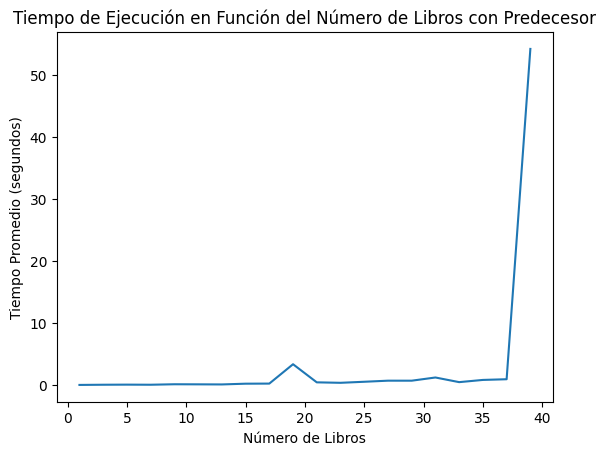

In [83]:
plot_resultados(n_libros_lista, tiempos_promedio, True)

# Experimento Paralelo

In [11]:
# Ejecutar el estudio y plotear los resultados
n_libros_max = 29
incremento = 3
n_replicas = 15

n_libros_lista2, tiempos_promedio2 = realizar_estudio(n_libros_max, incremento, n_replicas, False)

Iteración 1 de 150: Nº Libros = 1, Semilla = 4
Salida del comando:
 
ff: parsing domain file
domain 'BOOKSM3' defined
 ... done.
ff: parsing problem file
problem 'VECTOR1' defined
 ... done.



checking for cyclic := effects --- OK.

ff: search configuration is  best-first on 1*g(s) + 5*h(s) where
    metric is  plan length

advancing to distance:    1
                          0

ff: found legal plan as follows

step    0: LEER_NO_SUCESOR_NO_PARALEL LL_0 ENERO
     

time spent:    0.00 seconds instantiating 23 easy, 0 hard action templates
               0.00 seconds reachability analysis, yielding 26 facts and 23 actions
               0.00 seconds creating final representation with 26 relevant facts, 4 relevant fluents
               0.00 seconds computing LNF
               0.00 seconds building connectivity graph
               0.00 seconds searching, evaluating 3 states, to a max depth of 0
               0.00 seconds total time


Tiempo total: 0.00 segundos
Iteración 2 de 150: 

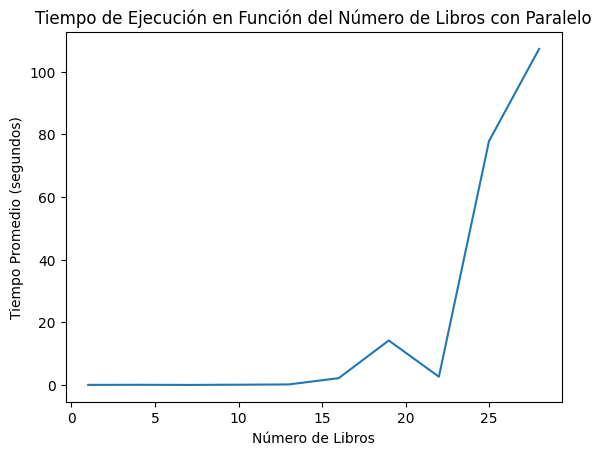

In [17]:
plot_resultados(n_libros_lista2, tiempos_promedio2, False)